In [1]:
import csv
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Each row represnts characteristic of a single product at a particular time . Many categorical data has 
#been coded to mask the data, you dont need to worry about their exact meaning 

#sku: Product Id
#national_inv:  inventory count  at national level
#lead_time: lead time for availability 
#in_transit_qty: In transit quantity 
#forecast_3_month: 3 month forecast for sale
#forecast_6_month:6 month forecats for sale
#forecast_9_month: 9 month forecast for sale
#sales_1_month: actual sales figure for last 1 month
#sales_3_month: actual sales figure for last 3 months
#sales_6_month:actual sales figure for last 6 months
#sales_9_month: actual sales figure for last 9 months
#min_bank: Minimum recommend amount to stock
#potential_issue: Source issue for part identified
#pieces_past_due: Parts overdue from source
#perf_6_month_avg:Source performance for prior 6 month period
#perf_12_month_avg:Source performance for prior 12 month
#local_bo_qty: Amount of stock orders overdue
#deck_risk:Part risk flag
#oe_constraint:Part risk flag
#ppap_risk:Part risk flag
#stop_auto_buy:Part risk flag
#rev_stop:Part risk flag
#went_on_backorder:Product actually went on backorder. This is the target value.(0 or 1)

In [3]:
df= pd.read_csv('../input/back-order-data-set/product_train.csv')

In [4]:
#first 5 entries
df.head(5)


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3921548,8,12,0,0,0,0,1,1,2,...,0,0.63,0.75,0,No,No,No,Yes,No,No
1,3191009,83,2,33,157,377,603,44,98,148,...,0,0.68,0.66,0,No,No,No,Yes,No,No
2,2935810,8,4,0,0,0,0,0,0,1,...,0,0.73,0.78,0,No,No,No,Yes,No,No
3,2205847,31,4,63,70,160,223,27,90,164,...,0,0.73,0.78,0,No,No,Yes,Yes,No,No
4,4953497,3,12,0,0,0,0,0,0,0,...,0,0.81,0.74,0,No,No,No,Yes,No,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250078 entries, 0 to 250077
Data columns (total 23 columns):
sku                  250078 non-null int64
national_inv         250078 non-null int64
lead_time            250078 non-null int64
in_transit_qty       250078 non-null int64
forecast_3_month     250078 non-null int64
forecast_6_month     250078 non-null int64
forecast_9_month     250078 non-null int64
sales_1_month        250078 non-null int64
sales_3_month        250078 non-null int64
sales_6_month        250078 non-null int64
sales_9_month        250078 non-null int64
min_bank             250078 non-null int64
potential_issue      250078 non-null object
pieces_past_due      250078 non-null int64
perf_6_month_avg     250078 non-null float64
perf_12_month_avg    250078 non-null float64
local_bo_qty         250078 non-null int64
deck_risk            250078 non-null object
oe_constraint        250078 non-null object
ppap_risk            250078 non-null object
stop_auto_buy        

In [6]:
df['went_on_backorder'].value_counts()

No     248463
Yes      1615
Name: went_on_backorder, dtype: int64

In [7]:
df.isnull().sum()

sku                  0
national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

In [8]:
#recode binary variables as 0 / 1 rather than No / Yes
for col in ['potential_issue',
            'deck_risk',
            'oe_constraint',
            'ppap_risk',
            'stop_auto_buy',
            'rev_stop',
            'went_on_backorder']:    
    df[col]=pd.factorize(df[col])[0]

In [9]:
df['perf_12_month_avg'].unique()
df['perf_6_month_avg']=df['perf_6_month_avg'].replace(-99, np.NaN)
df['perf_12_month_avg']=df['perf_12_month_avg'].replace(-99, np.NaN)
df.fillna(df.median(), inplace=True)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3921548,8,12,0,0,0,0,1,1,2,...,0,0.63,0.75,0,0,0,0,0,0,0
1,3191009,83,2,33,157,377,603,44,98,148,...,0,0.68,0.66,0,0,0,0,0,0,0
2,2935810,8,4,0,0,0,0,0,0,1,...,0,0.73,0.78,0,0,0,0,0,0,0
3,2205847,31,4,63,70,160,223,27,90,164,...,0,0.73,0.78,0,0,0,1,0,0,0
4,4953497,3,12,0,0,0,0,0,0,0,...,0,0.81,0.74,0,0,0,0,0,0,0
5,2286884,0,8,0,0,0,0,0,0,0,...,0,0.91,0.96,0,0,0,0,0,0,0
6,3867350,4995,52,0,0,0,0,0,0,0,...,0,0.59,0.70,0,1,0,0,1,0,0
7,2138874,365,8,84,174,462,654,61,202,452,...,0,0.99,0.99,1,0,0,0,0,0,0
8,4010669,11,3,0,0,0,0,0,0,0,...,0,0.84,0.76,0,0,0,0,0,0,0
9,2288075,1887,12,0,0,0,0,0,0,0,...,0,0.74,0.71,0,0,0,0,0,0,0


In [10]:
df=df.drop(['sku'],axis=1)

In [11]:
df.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,8,12,0,0,0,0,1,1,2,5,...,0,0.63,0.75,0,0,0,0,0,0,0
1,83,2,33,157,377,603,44,98,148,156,...,0,0.68,0.66,0,0,0,0,0,0,0
2,8,4,0,0,0,0,0,0,1,1,...,0,0.73,0.78,0,0,0,0,0,0,0
3,31,4,63,70,160,223,27,90,164,219,...,0,0.73,0.78,0,0,0,1,0,0,0
4,3,12,0,0,0,0,0,0,0,0,...,0,0.81,0.74,0,0,0,0,0,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250078 entries, 0 to 250077
Data columns (total 22 columns):
national_inv         250078 non-null int64
lead_time            250078 non-null int64
in_transit_qty       250078 non-null int64
forecast_3_month     250078 non-null int64
forecast_6_month     250078 non-null int64
forecast_9_month     250078 non-null int64
sales_1_month        250078 non-null int64
sales_3_month        250078 non-null int64
sales_6_month        250078 non-null int64
sales_9_month        250078 non-null int64
min_bank             250078 non-null int64
potential_issue      250078 non-null int64
pieces_past_due      250078 non-null int64
perf_6_month_avg     250078 non-null float64
perf_12_month_avg    250078 non-null float64
local_bo_qty         250078 non-null int64
deck_risk            250078 non-null int64
oe_constraint        250078 non-null int64
ppap_risk            250078 non-null int64
stop_auto_buy        250078 non-null int64
rev_stop             2500

In [13]:
Y=df['went_on_backorder']
X=df.drop(['went_on_backorder'],axis=1)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 1)

In [15]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_jobs = -1)
RF.fit(X_train, Y_train)
Y_pred = RF.predict(X_test)

In [16]:
RF.score(X_test,Y_test)

0.99408189379398593

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc, precision_recall_curve
print('Random Forest Classifier accuracy: %0.3f'% accuracy_score(Y_pred, Y_test))

Random Forest Classifier accuracy: 0.994


In [18]:
print("Random Forest Classifier report \n", classification_report(Y_pred, Y_test))

Random Forest Classifier report 
              precision    recall  f1-score   support

          0       1.00      0.99      1.00     24988
          1       0.09      0.70      0.16        20

avg / total       1.00      0.99      1.00     25008



In [19]:
def roc_curve_acc(Y_test, Y_pred, method):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='cyan' ,label='%s AUC = %0.3f'% (method, roc_auc))
    plt.legend(loc = 'lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

In [20]:
print('roc_auc_score: %0.3f'% roc_auc_score(Y_pred, Y_test))

roc_auc_score: 0.847


In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc, precision_recall_curve
print('Random Forest Classifier accuracy: %0.3f'% accuracy_score(Y_pred, Y_test))

Random Forest Classifier accuracy: 0.994


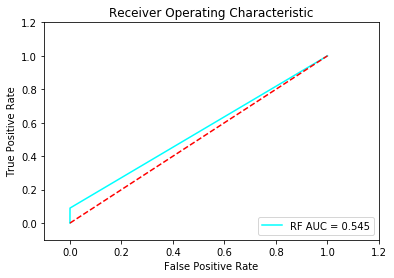

In [22]:
roc_curve_acc(Y_test, Y_pred, "RF")

PLS UPVOTE IF YOU LIKE